# Pinhole/Linear Camera Model

<img src="imgs/pinhole_camera_model.png" style="background : white">

A point $P$ in the 3-D world can be obtained by an image sensor according to the above image. 

- $[X_w \ Y_w \ Z_w]$ is the point coordinates in the world reference system. 
- $[X_c \ Y_c \ Z_c]$ is the point coordinates in the camera reference system.
- $[x \ y]$ is the point coordinates in sensor plane in [mm].
- $[u \ v]$ is the point coordinates in image plane in [pixels].  It's our primary source of information of the world. We will use this to lead us to, at least, $[X_c \ Y_c \ Z_c]$.

## From 3-D to 2-D

### Transformation from World to Camera Coordinate Frame

The transformation from the <u>world coordinate</u> frame to the <u>camera coordinate</u> frame is a 3D to 3D transformation. This is achieved using the extrinsic parameters of the camera, which are the rotation matrix (R) and the translation vector (T). The rotation matrix represents the orientation of the camera, while the translation vector represents its position in the world coordinate frame. It is given by:

$$
\begin{bmatrix}
X_c \\\
Y_c \\\
Z_c
\end{bmatrix} = R_{3\times 3}
\begin{bmatrix}
X_w \\\
Y_w \\\
Z_w
\end{bmatrix} +
\begin{bmatrix}
t_x \\\
t_y \\\
t_z
\end{bmatrix}
$$

Which in homegeneus matrix is given by:

$$
\begin{bmatrix}
X_c \\
Y_c \\
Z_c \\
1
\end{bmatrix} = 
\underbrace{
    \begin{bmatrix}
        R_{3 \times 3} & t_{3\times 1} \\
        0_{1\times 3} & 1 
    \end{bmatrix}
}_{Extrinsinc \ parameters \ T_{4\times 4}}
\begin{bmatrix}
X_w \\
Y_w \\
Z_w \\
1
\end{bmatrix}   \ \ \ (1)
$$

### Transformation from camera coordinate frame to sensor plane

By similarity of triangles we can make the perspective projection between the <u>Camera reference</u> system and the <u>Image Plane</u>:

$$
\frac{x}{X_C}=\frac{f}{Z_c} \rightarrow x = \frac{X_cf}{Z_c} \\
\frac{y}{Y_C}=\frac{f}{Z_c} \rightarrow y = \frac{Y_cf}{Z_c} 
$$

### Transformation from sensor plane to image plane

$$
u = f_x\frac{X_c}{Z_c} + c_x\\
v = f_y\frac{Y_c}{Z_c} + c_y\\
$$

Where $f_x = fm_x$ and $f_y = fm_y$. $m_x$ and $m_y$ pixel densities in $x$ and $y$ directions.

Which in homegeneus matrix is given by:

$$
\begin{bmatrix}
    u \\\
    v \\\
    1
\end{bmatrix} \equiv Z_c
\begin{bmatrix}
    u \\\
    v \\\
    1
\end{bmatrix} =
\begin{bmatrix}
    f_xX_c + c_xZ_c \\\
    f_yY_c + c_yZ_c \\\
    1
\end{bmatrix} =
\underbrace{
    \begin{bmatrix}
        f_x & 0 & c_x & 0 \\\
        0 & f_y & c_y & 0 \\\
        0 & 0 & 1 & 0
    \end{bmatrix}
}_{Intrinsic \ parameters \ [K_{3\times 3}|0]}
\begin{bmatrix}
    X_c \\\
    Y_c \\\
    Z_c \\\
    1
\end{bmatrix}   \ \ \ (2)
$$

The coordinate of a point in the world on the image plane can be achieved by combining equations (1) and (2):

$$
\begin{bmatrix}
u \\
v \\
1
\end{bmatrix}=
\underbrace{
        \underbrace{
            \begin{bmatrix}
                f_x & 0 & c_x & 0 \\
                0 & f_y & c_y & 0 \\
                0 & 0 & 1 & 0
            \end{bmatrix}
        }_{Intrinsinc \ parameters \ [K_{3\times 3}|0]}
        \underbrace{
            \begin{bmatrix}
                R_{3 \times 3} & t_{3\times 1} \\
                0_{1 \times 3} & 1 
            \end{bmatrix}
        }_{Extrinsinc \ parameters \ T_{4\times 4}}
}_{P_{3\times 4}}
\begin{bmatrix}
X_w \\
Y_w \\
Z_w \\
1
\end{bmatrix}  \ \ \ (3)
$$

The intrinsic parameters $(f_x,f_y,c_x,c_y)$ can be <u>informed by manufacturer</u> or found after the <u>calibration process</u> and are assumed to be known.

### Important notes:

- Scaling the projection matrix $P$, implies simultaneously scaling the world and the camera, which does not change the image.
- $kP$ and $P$ produces the same $Z_c\begin{bmatrix}    u \\\    v \\\    1\end{bmatrix}$

### Exercise

Given the camera matrix $C = \begin{bmatrix} 512 & -800 & 0 & 800 \\\ 512 & 0 & -8000 & 1600 \\\ 1 & 0 & 0 & 0\end{bmatrix}$, compute the image plane coodinate in the world at [4, 0, 0]:

In [200]:
import numpy as np

C = np.array([[512, -800, 0,    800],
              [512, 0,    -800, 1600],
              [1,   0,    0,    0]])
Pw = np.array([4,0,0]) # Point in world reference

# Solution
Pw_homogeneus = np.hstack( (Pw, [1]) )  # array([4, 0, 0, 1])
Pi_homogeneus = C @ Pw_homogeneus # Point in image reference = array([2848, 3648,    4])
Pi_homogeneus = Pi_homogeneus/Pi_homogeneus[2] # array([712., 912.,   1.])
u , v = Pi_homogeneus[0], Pi_homogeneus[1] # (712.0, 912.0)
print(f"Image plane point ({u}, {v})")

# Try scale C to find the same answer
C = 4*C
Pi_homogeneus = C @ Pw_homogeneus # Point in image reference = array([11392, 14592,    16])
Pi_homogeneus = Pi_homogeneus/Pi_homogeneus[2] # array([712., 912.,   1.])
u , v = Pi_homogeneus[0], Pi_homogeneus[1] # (712.0, 912.0)
print(f"Image plane point ({u}, {v})")

Image plane point (712.0, 912.0)
Image plane point (712.0, 912.0)


## Calibration process


The calibration consist in take pictures of an well known pattern, easy find a set of $[u^{(i)} v^{(i)} X_w^{(i)} Y_w^{(i)} Z_w^{(i)}], i=1,2,...,n$ correspondent points between 3-D and 2-D from these pictures and solve the equation (3) for $P$. Then, factorize $P$ into $K$ and $T$, extract $f_x$, $f_y$, $c_x$ and $c_y$ from $K$.

In practice, we also doesn't have $[X_w^{(i)} Y_w^{(i)} Z_w^{(i)}]$. The trick consist in explore the planar constrait and equal spacement between detected edges of our pattern, (corners in case of checkerboard), to define a temporary world reference sytem.

#### The object coordinate system in the checkerboard pattern as a temporary world reference system



<!-- 
```python
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches


f, ax = plt.subplots()
ax.imshow(cv2.imread("imgs/pattern.png"))

secax = ax.secondary_xaxis('top')
secax.set_xlabel('squares')
secax.set_xticks([7,22,36,51,66,81,95,110,125,140])
secax.set_xticklabels([-1,0,1,2,3,4,5,6,7,8]) 

secay = ax.secondary_yaxis('right')
secay.set_ylabel('squares')
secay.set_yticks([9,24,39,54,68,84,98,113])
secay.set_yticklabels([6,5,4,3,2,1,0,-1]) 

ax.set_xlabel('pixel')
ax.set_xticks([7,22,36,51,66,81,95,110,125,140])
ax.set_xticklabels([7,22,36,52,66,82,96,112,126,142]) 

ax.set_ylabel('pixel')
ax.set_yticks([9,24,39,54,68,84,98,113])
ax.set_yticklabels([9,24,39,54,69,84,99,114]) 

# Plot the line
ax.plot([22, 45], [98, 98],linewidth=3,label="objP x")
ax.plot([22, 22 ], [98, 75],linewidth=3,label="objP y")
ax.plot(22, 98, 'ro', color='green',label="objP z")

circle = patches.Circle((22, 98), 3, fill=False, edgecolor='green')

# Add the circle to the plot
ax.add_patch(circle)

ax.grid()
plt.legend()
plt.title("Object pattern reference system")

```
-->

<img src="imgs/objp.jpg">

The above image represent one of several pictures taken from a static camera and chess boards placed at different locations and orientations. So we need to know $[X_w^{(i)} Y_w^{(i)} Z_w^{(i)}]$ values. But for simplicity, we can say chess board was kept stationary at XY plane, (so $Z_w^{(i)}=0$ always) and camera was moved accordingly. This consideration helps us to find only $[X_w^{(i)} Y_w^{(i)}]$ values simply passing the points as (0,0), (1,0), (2,0), ... which denotes the location of points. In this case, the results we get will be in the scale of size of chess board square. But if we know the square size, (say 30 mm), we can pass the values as (0,0), (30,0), (60,0), ... . Thus, we get the results in mm. 

3D points are called object points and 2D image points are called image points. 

From the above image, the corners are the places where two black squares meet each other, so we have a pattern with 9x6 corners, from that we can estabilish 54 correspondences, in example:

| u  | v  | $X_w$ | $Y_w$ | $Z_w$ | 
| -- | -- | ----- | ----- | ------|
| 22 | 99 |   0   | 0     | 0     |
| 36 | 99 |   1   | 0     | 0     |
| 52 | 99 |   2   | 0     | 0     |
| 66 | 99 |   3   | 0     | 0     |
| ... | ... |   ...   | ...     | ...     |
| 22 | 84 |   0   | 1     | 0     |
| 22 | 69 |   0   | 2     | 0     |
| 22 | 54 |   0   | 3     | 0     |
| ... | ... |   ...   | ...     | ...     |

The coorespondence can be done mannually or using an automatic algorithm.

#### Usage of calibration data to solve P 

After gathering $[u^{(i)} v^{(i)} X_w^{(i)} Y_w^{(i)} Z_w^{(i)}], i=1,2,...,n$ correspondent points we start at equation (3) applied to each point:

$$
w\begin{bmatrix}
    u \\
    v \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix}
\begin{bmatrix}
    X_w \\
    Y_w \\
    0 \\
    1
\end{bmatrix} \\
$$

The 3rd columns is always multiplied by 0 so we can rewrite to:

$$
w\begin{bmatrix}
    u \\
    v \\
    1
\end{bmatrix} = 
\underbrace{\begin{bmatrix}
    h_{11} & h_{12} & h_{13} \\
    h_{21} & h_{22} & h_{23} \\
    h_{31} & h_{32} & h_{33}
\end{bmatrix}}_{Homography \ \ matrix \ (H)}
\begin{bmatrix}
    X_w \\
    Y_w \\
    1
\end{bmatrix} \\
$$

We can divide H by $h_{33}$ since it is scale invariant, so we will have 8 unique numbers to estimate. Doing the math we have:

$$
w\begin{bmatrix}
    u \\
    v \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    h_{11} & h_{12} & h_{13} \\
    h_{21} & h_{22} & h_{23} \\
    h_{31} & h_{32} & 1
\end{bmatrix}
\begin{bmatrix}
    X_w \\
    Y_w \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    h_{11}X_w + h_{12}Y_w + h_{13} \\
    h_{21}X_w + h_{22}Y_w + h_{23} \\
    h_{31}X_w + h_{32}Y_w + 1
\end{bmatrix} 
$$
$$
u = \frac{h_{11}X_w + h_{12}Y_w + h_{13}}{h_{31}X_w + h_{32}Y_w + 1} 
$$
$$
v = \frac{h_{21}X_w + h_{22}Y_w + h_{23}}{h_{31}X_w + h_{32}Y_w + 1} \\
$$
$$
h_{11}X_w + h_{12}Y_w + h_{13} - u h_{31}X_w - u h_{32}Y_w  - u = 0 \\

h_{21}X_w + h_{22}Y_w + h_{23} - v h_{31}X_w  - v  h_{32}Y_w - v = 0
$$

Making this as a vector multiplication we have:

$$
\begin{bmatrix}
X_w & Y_w & 1 & 0   & 0   & 0 & -uX_w & -uY_w & -u \\
0   &  0  & 0 & X_w & Y_w & 1 & -vX_w & -vY_w & -v 
\end{bmatrix}
\begin{bmatrix}
 h_{11} \\
 h_{12} \\
 h_{13} \\
 h_{21} \\
 h_{22} \\
 h_{23} \\
 h_{31} \\
 h_{32} \\
 1
\end{bmatrix} = 0
$$


And for our found set we have:

$$
\begin{bmatrix}
X_w^{(1)} & Y_w^{(1)} & 1 & 0   & 0   & 0 & -u^{(1)}X_w^{(1)} & -u^{(1)}Y_w^{(1)} & -u^{(1)} \\
0   &  0  & 0 & X_w^{(1)} & Y_w^{(1)} & 1 & -v^{(1)}X_w^{(1)} & -v^{(1)}Y_w^{(1)} & -v^{(1)} \\
\vdots \\
X_w^{(n)} & Y_w^{(n)} & 1 & 0   & 0   & 0 & -u^{(n)}X_w^{(n)} & -u^{(n)}Y_w^{(n)} & -u^{(n)} \\
0   &  0  & 0 & X_w^{(n)} & Y_w^{(n)} & 1 & -v^{(n)}X_w^{(n)} & -v^{(n)}Y_w^{(n)} & -v^{(n)}
\end{bmatrix}
\begin{bmatrix}
 h_{11} \\
 h_{12} \\
 h_{13} \\
 h_{21} \\
 h_{22} \\
 h_{23} \\
 h_{31} \\
 h_{32} \\
 1
\end{bmatrix} = 0 
$$

$$
\begin{bmatrix}A\end{bmatrix}_{2n \ \times \ 9}\ \begin{bmatrix}h\end{bmatrix}_{9 \ \times\ 1} = 0
$$

Notice that 4 world points and their corresponding image points are the minimun set to solve $H$ through constrained least squares parameter estimation method. The scale of $h$ is set and the problem is transformed into <u>[A][h] tending to [0]</u> such that <u>||h||=1</u>:

$$
min (||Ah||^2) \ subject \ to \ ||h||=1
$$

$$
min (h^TA^TAh) \ subject \ to \ h^Th=1
$$

We can define a convenient loss function we want to minimize:

$$
min = h^TA^TAh - \lambda(h^Th -1)
$$

Taking the derivative with respect to $h$, we have:

$$
0 = 2A^TAh - 2\lambda h
$$

That is equivalent to solving the eigenvalue problem:

$$
A^TAh = \lambda h
$$

$h$ is the eigenvector corresponding to smallest eigenvalue of $A^TA$.

<!--
#### Usage of calibration data to solve P

After gathering $[u^{(i)} v^{(i)} X_w^{(i)} Y_w^{(i)} Z_w^{(i)}], i=1,2,...,n$ correspondent points we start at equation (3) applied to each point:

$$
Z_w\begin{bmatrix}
    u \\
    v \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix}
\begin{bmatrix}
    X_w \\
    Y_w \\
    Z_w \\
    1
\end{bmatrix} =
\begin{bmatrix}
    p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14} \\
    p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24} \\
    p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}
\end{bmatrix} \\
$$
$$
u = \frac{p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14}}{p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}} \\

v = \frac{p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24}}{p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}} \\
$$
$$
p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14} - up_{31}X_w - u p_{32}Y_w - u p_{33}Z_w - u p_{34} = 0 \\

p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24} - vp_{31}X_w - v p_{32}Y_w - v p_{33}Z_w - v p_{34} = 0
$$

Making this as a vector multiplication we have:

$$
\begin{bmatrix}
X_w & Y_w & Z_w & 1 & 0   & 0   & 0   & 0 & -uX_w & -uY_w & -uZ_w & -u \\
0   &  0  & 0   & 0 & X_w & Y_w & Z_w & 1 & -vX_w & -vY_w & -vZ_w & -v 
\end{bmatrix}
\begin{bmatrix}
 p_{11} \\
 p_{12} \\
 p_{13} \\
 p_{14} \\
 p_{21} \\
 p_{22} \\
 p_{23} \\
 p_{24} \\
 p_{31} \\
 p_{32} \\
 p_{33} \\
 p_{34}
\end{bmatrix} = 0
$$

And for our found set we have:

$$

\begin{bmatrix}
X_w^{(1)} & Y_w^{(1)} & Z_w^{(1)} & 1 & 0   & 0   & 0   & 0 & -u^{(1)}X_w^{(1)} & -u^{(1)}Y_w^{(1)} & -u^{(1)}Z_w^{(1)} & -u^{(1)} \\
0   &  0  & 0   & 0 & X_w^{(1)} & Y_w^{(1)} & Z_w^{(1)} & 1 & -v^{(1)}X_w^{(1)} & -v^{(1)}Y_w^{(1)} & -v^{(1)}Z_w^{(1)} & -v^{(1)} \\
\vdots \\
X_w^{(n)} & Y_w^{(n)} & Z_w^{(n)} & 1 & 0   & 0   & 0   & 0 & -u^{(n)}X_w^{(n)} & -u^{(n)}Y_w^{(n)} & -u^{(n)}Z_w^{(n)} & -u^{(n)} \\
0   &  0  & 0   & 0 & X_w^{(n)} & Y_w^{(n)} & Z_w^{(n)} & 1 & -v^{(n)}X_w^{(n)} & -v^{(n)}Y_w^{(n)} & -v^{(n)}Z_w^{(n)} & -v^{(n)} \\
\end{bmatrix}
\begin{bmatrix}
 p_{11} \\
 p_{12} \\
 p_{13} \\
 p_{14} \\
 p_{21} \\
 p_{22} \\
 p_{23} \\
 p_{24} \\
 p_{31} \\
 p_{32} \\
 p_{33} \\
 p_{34}
\end{bmatrix} = 0 
$$

$$
\begin{bmatrix}A\end{bmatrix}_{2n \ \times \ 12}\ \begin{bmatrix}p\end{bmatrix}_{12 \ \times\ 1}=0
$$

Which is solveable through constrained least squares parameter estimation method. The scale of $p$ is set and the problem is transformed into <u>[A][p] tending to [0]</u> such that <u>||p||=1</u>:

$$
min (||Ap||^2) \ subject \ to \ ||p||=1
$$

$$
min (p^TA^TAp) \ subject \ to \ p^Tp=1
$$

We can define a convenient loss function we want to minimize:

$$
min = p^TA^TAp - \lambda(p^Tp -1)
$$

Taking the derivative with respect to $p$, we have:

$$
0 = 2A^TAp - 2\lambda p
$$

That is equivalent to solving the eigenvalue problem:

$$
A^TAp = \lambda p
$$

$p$ is the eigenvector corresponding to smallest eigenvalue of $A^TA$.

#### Factorizing P

$$
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x & 0 \\
    0 & f_y & c_y & 0 \\
    0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
    R_{3 \times 3} & t_{3\times 1} \\
    0_{1 \times 3} & 1 
\end{bmatrix}
$$

The first $3 \times 3$ block of $P$ is:

$$
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{23} \\
    p_{31} & p_{32} & p_{33} 
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
    R\\
\end{bmatrix} = KR
$$

Where $K$ (the camera matrix) happen to be an upper triangular matrix and $R$ is a rotation matrix, thereby, orthonormal. With this, we can use *QR factorization* to compute $K$ and $R$.

The last $3 \times 1$ block of $P$ is:

$$
\begin{bmatrix}
    p_{14} \\
    p_{24} \\
    p_{34} 
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
    t_x \\
    t_y \\
    t_z
\end{bmatrix} = Kt
$$

Therefore we can compute $t$:

 $$
 t = K^{-1}\begin{bmatrix}
    p_{14} \\
    p_{24} \\
    p_{34} 
\end{bmatrix}
$$

And we can transform from the world to camera reference frame with equation (1)

$$
\begin{bmatrix}
X_c \\
Y_c \\
Z_c \\
1
\end{bmatrix} = 
\underbrace{
    \begin{bmatrix}
        R_{3 \times 3} & t_{3\times 1} \\
        0_{1\times 3} & 1 
    \end{bmatrix}
}_{Extrinsinc \ parameters \ T_{4\times 4}}
\begin{bmatrix}
X_w \\
Y_w \\
Z_w \\
1
\end{bmatrix} 
$$
-->

You have notice that each image might give different correspondences and $P$, therefore different $K$ (intrinsic parameters), $R$ and $t$ (extrinsic parameters). We need them, because the linear camera model do not take in account the <u>distortions</u> caused by lenses. We have to incorporate more parameters to our camera model leading to a non-limear camera model. Do a separate calibration just to find these extra parameters to obtain a linearized camera model. Finaly we can do the calibration method above.

## Code for calibration - The short way using OpenCV implementation

In [1]:
# Imports 
import os
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Open Data
folder = "./calib_imgs/calib_photos_Pi_NOIR_2.1/" 
image_names = [f"{folder}{f}" for f in os.listdir(folder) if ".jpg" in f]
images = [cv2.imread(f) for f in image_names]

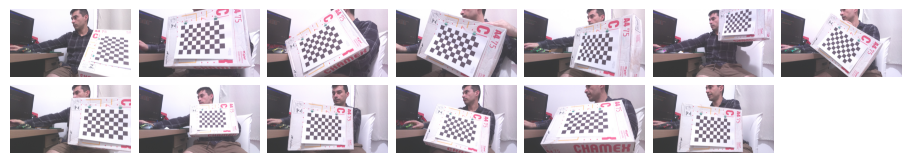

In [2]:
# Functions
def print_table(matrix):
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))

def plotar(imgs):
    f, ax = plt.subplots(2,7, figsize=(9,6), layout="compressed")
    for i in range(0,7):
        ax[0,i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
        try:
            ax[1,i].imshow(cv2.cvtColor(imgs[i+7], cv2.COLOR_BGR2RGB))
        except IndexError:
            pass
        ax[0,i].axis('off')
        ax[1,i].axis('off')
    plt.show()

# Display what we got
plotar(images)

In [3]:
# Define the dimensions of checkerboard 
CHECKERBOARD = (6, 9) 

# stop the iteration when specified 
# accuracy, epsilon, is reached or 
# specified number of iterations are completed. 
criteria = (cv2.TERM_CRITERIA_EPS +
			cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) 

# Vector for 3D points 
threedpoints = [] 

# Vector for 2D points 
twodpoints = [] 

# 3D points real world (faked) coordinates 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objectp3d = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), 
					  np.float32) 
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0], 
							   0:CHECKERBOARD[1]].T.reshape(-1, 2) 

print("Openning checkerbooard photos taken...")
for i in tqdm(range(len(images))): 
	grayColor = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY) 

	# Find the chess board corners 
	# If desired number of corners are 
	# found in the image then ret = true 
	ret, corners = cv2.findChessboardCorners( 
					grayColor, CHECKERBOARD, 
					cv2.CALIB_CB_ADAPTIVE_THRESH 
					+ cv2.CALIB_CB_FAST_CHECK +
					cv2.CALIB_CB_NORMALIZE_IMAGE) 

	# If desired number of corners can be detected then, 
	# refine the pixel coordinates and display 
	# them on the images of checker board 
	if ret == True: 
		threedpoints.append(objectp3d) 

		# Refining pixel coordinates 
		# for given 2d points. 
		corners2 = cv2.cornerSubPix( 
			grayColor, corners, (11, 11), (-1, -1), criteria) 

		twodpoints.append(corners2) 

		# Draw and display the corners 
		images[i] = cv2.drawChessboardCorners(images[i], 
											CHECKERBOARD, 
											corners2, ret)
		
	# plt.imshow( cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) ) 
	# plt.axis('off')
	# plt.show()

h, w = images[-1].shape[:2] 

# Perform camera calibration by 
# passing the value of above found out 3D points (threedpoints) 
# and its corresponding pixel coordinates of the 
# detected corners (twodpoints) 
print("Calibrating...") 
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera( 
	threedpoints, twodpoints, grayColor.shape[::-1], None, None) 

# Displaying required output 
print(" Camera matrix:") 
print_table(matrix)

print("\n Distortion coefficient:") 
print_table(distortion) 

print("\n Rotation Vectors shape:") 
print(np.array(r_vecs).shape) 

print("\n Translation Vectors shape:") 
print(np.array(t_vecs).shape) 

# Undistortion to refine K
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(matrix, distortion, (w,h), 1, (w,h))
print("\n New Camera matrix:") 
print_table(newcameramtx)

# print("\n ROI:") 
# print(roi)

Openning checkerbooard photos taken...


100%|██████████| 13/13 [00:03<00:00,  3.29it/s]


Calibrating...
 Camera matrix:
1588.6946871575205	0.0               	897.0333009926757
0.0               	1582.8698836215092	429.3280302678728
0.0               	0.0               	1.0              

 Distortion coefficient:
0.12562973442875908	0.014161090552953408	-0.02470394103841826	-0.014853237825418763	-0.29372326092439294

 Rotation Vectors shape:
(13, 3, 1)

 Translation Vectors shape:
(13, 3, 1)

 New Camera matrix:
1571.8583984375	0.0               	852.9632202340872
0.0            	1525.5155029296875	402.7172230706674
0.0            	0.0               	1.0              


In [4]:
## Check Results
# undistort
dst = cv2.undistort(images[-1], matrix, distortion, None, newcameramtx)
 
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite(f'{image_names[-1].split(".jpg")[0]}_calibresult.png', dst)

# Re-projection Error, close to 0 is better.
mean_error = 0
for i in range(len(threedpoints)):
    imgpoints2, _ = cv2.projectPoints(threedpoints[i], r_vecs[i], t_vecs[i], newcameramtx, distortion)
    error = cv2.norm(twodpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
 
print( "total error: {}".format(mean_error/len(threedpoints)) )

total error: 7.684557800783073


We can see that Rotation (r_vectors) and translation (r_vectors) are not $R$ and $t$ defined above. 

[calibrateCamera()](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html): Output vector of rotation vectors (Rodrigues) estimated for each pattern view. That is, each i-th rotation vector together with the corresponding i-th translation vector brings the calibration pattern from the object coordinate space (in which object points are specified) to the camera coordinate space. In more technical terms, the tuple of the i-th rotation and translation vector performs a change of basis from object coordinate space to camera coordinate space. Due to its duality, this tuple is equivalent to the position of the calibration pattern with respect to the camera coordinate space.

## Code of 3-D to 2-D transformation

Here we transofrm from object pattern reference system [square] to sensor reference system [pixel].

In [46]:
# https://docs.opencv.org/4.x/d7/d53/tutorial_py_pose.html

# Imports 
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Open Data
folder = "./calib_imgs/calib_photos_Pi_NOIR_2.1/" 
# Load previously saved data
mtx = np.loadtxt(f"{folder}camera_matrix.npy")
dist = np.loadtxt(f"{folder}distortion_coefficient.npy")
image_names = [f"{folder}{f}" for f in os.listdir(folder) if ".jpg" in f]

#Functions
def draw(img, corner, imgpts):
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 15)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 15)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 15)
    return img


./calib_imgs/calib_photos_Pi_NOIR_2.1/14.jpg
Origin of object pattern system [0. 0. 0.] => In pixel coordinate (1800, 829)
Axis-x vector in object pattern coordinate [3. 0. 0.] => In pixel coordinate [1568  796]
Axis-y vector in object pattern coordinate [0. 3. 0.] => In pixel coordinate [1802  685]
Axis-z vector in object pattern coordinate [ 0.  0. -3.] => In pixel coordinate [1827  687]


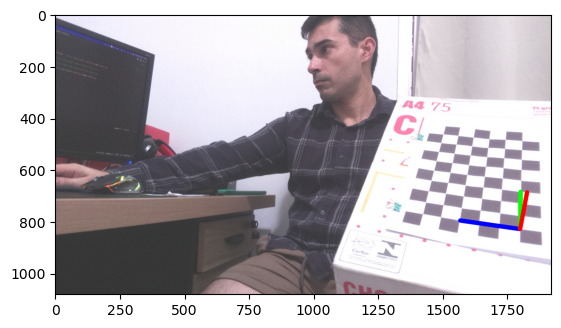


./calib_imgs/calib_photos_Pi_NOIR_2.1/01.jpg
Origin of object pattern system [0. 0. 0.] => In pixel coordinate (698, 650)
Axis-x vector in object pattern coordinate [3. 0. 0.] => In pixel coordinate [722 451]
Axis-y vector in object pattern coordinate [0. 3. 0.] => In pixel coordinate [900 641]
Axis-z vector in object pattern coordinate [ 0.  0. -3.] => In pixel coordinate [579 611]


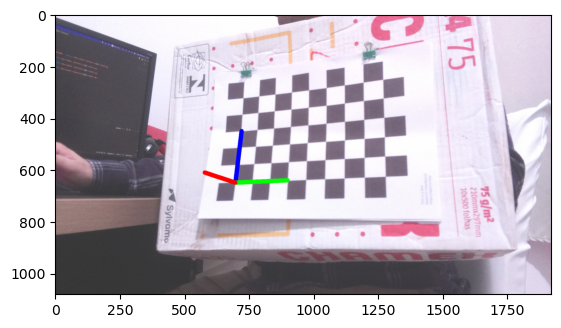

In [67]:
CHECKERBOARD = (6, 9) 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32) 
objp[0, :, :2] = np.mgrid[0:CHECKERBOARD[0], 
                          0:CHECKERBOARD[1]].T.reshape(-1, 2) 

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

for i in range(2):
    print()
    print(image_names[i])
    img = cv2.imread(image_names[i])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)
    if ret:
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret, rvecs, tvecs = cv2.solvePnP(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
        # rounding pixel coordinates of projected axis
        imgpts = np.round(imgpts).astype(int)
        # get 1st corner and rounding pixel coordinates
        corner = tuple(int(round(num, 0)) for num in corners2[0].ravel()) 
        print(f"Origin of object pattern system {objp[0][0]} => In pixel coordinate {corner}")
        print(f"Axis-x vector in object pattern coordinate {axis[0]} => In pixel coordinate {imgpts[0].ravel()}")
        print(f"Axis-y vector in object pattern coordinate {axis[1]} => In pixel coordinate {imgpts[1].ravel()}")
        print(f"Axis-z vector in object pattern coordinate {axis[2]} => In pixel coordinate {imgpts[2].ravel()}")
        # drawing projected axis on top of the original image
        img = draw(img,corner,imgpts)
        # plot
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

In [ ]:
# Now forget about the pattern
corner = (30, 30) 
print(f"Origin of object pattern system {objp[0][0]} => In pixel coordinate {corner}")
print(f"Axis-x vector in object pattern coordinate {axis[0]} => In pixel coordinate {imgpts[0].ravel()}")
print(f"Axis-y vector in object pattern coordinate {axis[1]} => In pixel coordinate {imgpts[1].ravel()}")
print(f"Axis-z vector in object pattern coordinate {axis[2]} => In pixel coordinate {imgpts[2].ravel()}")

## Code of internal calibration - The short way using OpenCV implementation